### Build Dataset

In [6]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from utils.build_dataset import build_dataset

file_name = 'data_test.csv'
file_path = os.path.join('data', 'csv_positions', file_name)

dataset, x, y, dataframe = build_dataset(file_path, 10000, 16)

print(dataset.cardinality().numpy())
dataframe.describe()


625


,eval
count,10000.000000
mean,10.798920
std,254.621792
min,-999.990000
25%,-0.990000
50%,0.060000
75%,1.542500
max,999.990000


In [7]:
from utils.build_dataset import split_dataset

train_dataset, test_dataset = split_dataset(dataset, 0.8)

### Import Model

In [8]:
import tensorflow as tf
from model.models import ChessModel

model = ChessModel(nb_filters=32, activation= 'relu', input_shape=(8,8,6)).model

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          1760      
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 73697 (287.88 KB)
Trainable params: 73697 

### Callbacks

In [13]:
import os
from utils.callback_setup import callback_setup

checkpoint_name = "test/"
checkpoint_filepath = os.path.join('data', 'backup', checkpoint_name)

model_callbacks = callback_setup(checkpoint_filepath)



In [14]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=(test_dataset),
                    verbose=1,
                    callbacks=model_callbacks
                    )

Epoch 1/20
  1/500 [..............................] - ETA: 3s - loss: 189.5104 - mae: 189.5104

500/500 [==============================] - 1s 3ms/step - loss: 58.5247 - mae: 58.5247 - val_loss: 73.9151 - val_mae: 73.9151
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 57.7220 - mae: 57.7220 - val_loss: 74.0180 - val_mae: 74.0180
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 57.6147 - mae: 57.6147 - val_loss: 72.7441 - val_mae: 72.7441
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 57.7379 - mae: 57.7379 - val_loss: 73.1989 - val_mae: 73.1989
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 56.8223 - mae: 56.8223 - val_loss: 74.0645 - val_mae: 74.0645
Epoch 6/20
500/500 [==============================] - 2s 3ms/step - loss: 57.2151 - mae: 57.2151 - val_loss: 73.9134 - val_mae: 73.9134
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 57.0230 - mae: 57.0230 - val_loss: 74.5415 - val_mae: 74.5415
Epoch 8/20
500/500 [==============================] - 2s 3m

KeyboardInterrupt: 

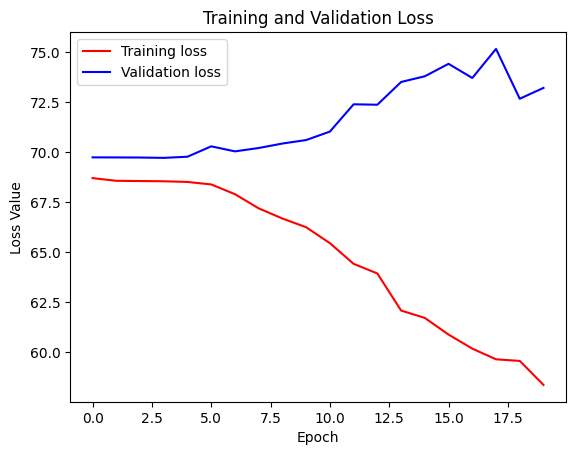

In [11]:
from utils.plot_loss import plot_loss
plot_loss(history.epoch, history.history["loss"], history.history["val_loss"])

In [12]:
from utils.converter import convert_fen_to_array
file_path = 'data/csv_positions/data_test.csv'
#load data
df = pd.read_csv(file_path)
df = df[10:20]

x_fen, y_eval = list(df['fen']), list(df['eval'])
input_tensor = tf.convert_to_tensor(list(df['fen'].map(convert_fen_to_array).to_numpy()))

print('y_eval:',y_eval)

output_tensor = model.predict(input_tensor)
# print(input_tensor)
print(output_tensor)

y_eval: [-0.06, 0.4, -0.34, 0.36, -0.43, 0.36, 0.0, 0.16, -0.06, 0.38]
1/1 [==============================] - 0s 103ms/step
[[0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]
 [0.07109191]]
